In [15]:
import numpy as np
import pandas as pd 

# Import the data
df = pd.read_csv('/Users/elvisechefu/Desktop/language detection/languages.csv')
df.head(20)


,text,language
0,ich denke es handelt sich hier um ein missvers...,german
1,ich habe tom gerade erst verlassen,german
2,tom versuchte mary nur zu ärgern,german
3,tom hat mir die hand geküsst,german
4,ich wusste dass dir das gefiele,german
5,gehen sie mir aus dem weg,german
6,zieht eure schlafanzüge an,german
7,als kind war ich süchtig nach kriminalromanen,german
8,ich habe das auto mit zehn prozent rabatt gekauft,german
9,niemand anders könnte meine arbeit machen,german


In [16]:
labels = df['language'].values


In [17]:
# Get all unique languages values
print(df.groupby('language').nunique())
print(f"Total Length of dataset: {len(df)}")

            text
language        
english   275687
french    169693
german    199618
spanish   118686
Total Length of dataset: 763684


In [18]:
# Check for missing values
print(df.isnull().sum())


text        0
language    0
dtype: int64


In [19]:
# Explore the columns and their types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763684 entries, 0 to 763683
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      763684 non-null  object
 1   language  763684 non-null  object
dtypes: object(2)
memory usage: 11.7+ MB
None


In [20]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip (columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df , dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

df = onehot_encode(
    df,
    columns=['language'],
    prefixes=['lan']
)
df.head()

,text,lan_english,lan_french,lan_german,lan_spanish
0,ich denke es handelt sich hier um ein missvers...,False,False,True,False
1,ich habe tom gerade erst verlassen,False,False,True,False
2,tom versuchte mary nur zu ärgern,False,False,True,False
3,tom hat mir die hand geküsst,False,False,True,False
4,ich wusste dass dir das gefiele,False,False,True,False


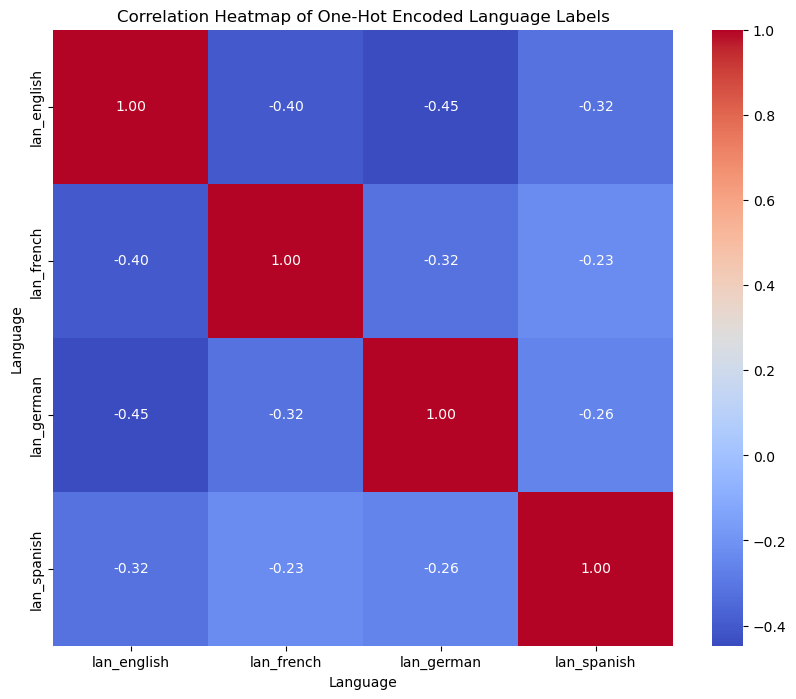

In [21]:
#Represnting the data in a heta-map as a form of visualisation

import seaborn as sns
import matplotlib.pyplot as plt

language_columns = [col for col in df.columns if col.startswith('lan_')]

# Calculate the correlation matrix
correlation_matrix = df[language_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of One-Hot Encoded Language Labels')
plt.xlabel('Language')
plt.ylabel('Language')
plt.show()

CHARATCER EMEDDING 

In [22]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Extract text data from the DataFrame
sentences = df['text'].tolist()

# Tokenize the characters in the text data
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(sentences)  
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to ensure uniform length.
max_sequence_length = max(len(seq) for seq in sequences)
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length)

# Create character-level embeddings
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))  # can be adjusted if needed
for char, char_index in tokenizer.word_index.items():
    embedding_matrix[char_index] = np.random.uniform(-1, 1, 100)  # Random initialization of embeddings



In [23]:
# Convert embedding matrix to DataFrame
embedding_df = pd.DataFrame(embedding_matrix)

# Display the DataFrame
print(embedding_df)

          0         1         2         3         4         5         6   \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  -0.982341 -0.859462  0.504235  0.414519 -0.240864 -0.214350 -0.897346   
2   0.900368 -0.728946  0.984196 -0.857883  0.221721  0.212839  0.092836   
3  -0.669989 -0.419353  0.691756 -0.497698  0.194154  0.543525  0.316669   
4  -0.348944  0.764309 -0.591622  0.604863 -0.139387  0.688212 -0.499051   
..       ...       ...       ...       ...       ...       ...       ...   
73 -0.884745  0.396918 -0.151924 -0.099039 -0.036282  0.160700 -0.751472   
74 -0.913907 -0.709134 -0.942040 -0.693746 -0.385041  0.668972  0.810395   
75  0.642229  0.687212  0.616115  0.955006  0.372200 -0.444865  0.228684   
76 -0.471568  0.221242  0.579446 -0.658946  0.794423  0.893240  0.103131   
77 -0.377061 -0.513237  0.864449 -0.114929 -0.317399  0.829008 -0.230809   

          7         8         9   ...        90        91        92        93  \
0   0.

SPLITING THE DATASET INTO TRAIN, VALIDATE AND TEST SETS 

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels, test_size=0.2, random_state=42)

# Further split the training data into train and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# X_train, y_train: Training data and labels (60% of the original data)
# X_val, y_val: Validation data and labels (20% of the original data)
# X_test, y_test: Test data and labels (20% of the original data)

IMPORTING THE SVM MODEL

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM Model
svm_model = SVC(kernel='linear') 

TRAINING THE MODEL

In [26]:
# Train the Model
svm_model.fit(X_train, y_train)

VAILIDATING THE MODEL

In [ ]:
# Validate the Model
y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

In [ ]:
# Predict on the Test Set
# y_test_pred = svm_model.predict(X_test)

# Evaluate the Model
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Test Accuracy:", test_accuracy)